In [1]:
from sklearn.model_selection  import train_test_split
from sklearn.linear_model import Lasso,Ridge,LinearRegression
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import time

In [2]:
df = yf.download("BTC-USD", start="2010-01-01", end="2024-01-01")

[*********************100%%**********************]  1 of 1 completed


In [3]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [4]:
X = df[["Open","High","Low","Volume"]]
y = df["Close"]

In [5]:
#pre procsses
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2, shuffle=False)

In [6]:
result_list = []

for model in [LinearRegression(), Lasso(), Ridge()]:
        start = time.time()
        #train
        model.fit(x_train,y_train)

        #predict

        y_train_pred = model.predict(x_train)
        y_test_pred = model.predict(x_test)
        y_all_pred = model.predict(X)

        #evalute
        rmse_all = np.sqrt(mean_squared_error(y,y_all_pred))
        rmse_train = np.sqrt(mean_squared_error(y_train,y_train_pred))
        rmse_test = np.sqrt(mean_squared_error(y_test,y_test_pred))

        end = time.time()
        #resualt collecting
        result = {
              "model"  : f"{model}",
              "rmse_all" : rmse_all,
              "rmse_train" : rmse_train,
              "rmse_test" : rmse_test,
              "time" : end - start
        }
        result_list.append(result)



#make Dataframe

result_df = pd.DataFrame(result_list)
result_df

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.401e+08, tolerance: 7.046e+07
  model = cd_fast.enet_coordinate_descent(


,model,rmse_all,rmse_train,rmse_test,time
0,LinearRegression(),322.344671,324.464609,313.728139,0.033457
1,Lasso(),422.937647,420.626958,432.050197,0.041568
2,Ridge(),322.344671,324.464609,313.728139,0.015766


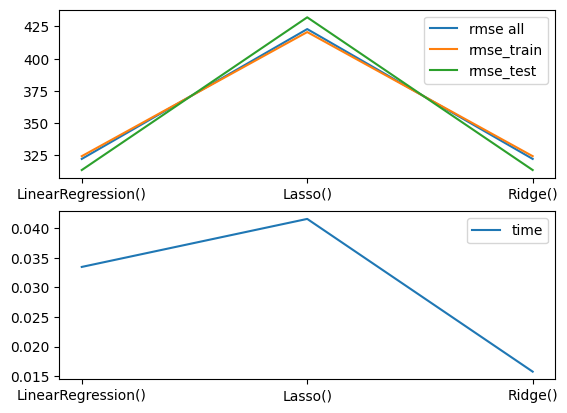

In [7]:
# Visualzition

plt.subplot(2,1,1)
plt.plot(result_df["model"],result_df["rmse_all"], label = "rmse all" )
plt.plot(result_df["model"],result_df["rmse_train"], label = "rmse_train")
plt.plot(result_df["model"],result_df["rmse_test"], label  = "rmse_test")
plt.legend()

plt.subplot(2,1,2)
plt.plot(result_df["model"],result_df["time"], label = "time")
plt.legend()



plt.show()

In [8]:
model.predict([[58110.30, 58268.83 ,49121.24,108991085584]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


array([52400.90358467])

In [12]:
#model

model = LinearRegression()
model.fit(x_train,y_train)

#predict

y_all_pred = model.predict(X)
y_test_pred = model.predict(x_test)
y_train_pred = model.predict(x_train)

In [13]:
model.predict([[58110.30, 58268.83 ,49121.24,108991085584]])  #56,496.52

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([52400.90358802])

In [11]:
model.predict([[60676.09	, 61062.99, 	57210.80, 		31758917219]]) #58557

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([58557.68398709])